<div style="text-align: center; font-weight: bold; font-size: 300%">Projet INF442</div>                                                        <br /> 
<div style="text-align: center; font-weight: bold; font-size: 180%">Data processing Tweets et perturbation</div>                                                        <br />  
<div style="text-align: center; font-size: 150%">École Polytechnique, mai 2020</div><br />  
<div style="text-align: center; font-size: 120%">Paul Calot et Jean-Charles Layoun</div>

In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pylab as plt
from datetime import datetime

## Conversion du fichier LineInfoRB à un fichier de type .csv

In [2]:
## Création des csv utilisés par preprocessing et processing

path1 = "DonneesRATP_Projet2020_Jeux_1/Donnees_RerB_6/"

for i in range(1, 5): 
    workingFile = path1 + "LineInfoRB" + str(i)
    
    f = open(workingFile, "r", encoding = 'latin1')
    Rd = f.read()

    out = []

    l = u""
    for el in Rd:
        if(el == "\n"):
            out.append(l)
            l = u""
        else:
            l += str(el)
            
    # Replaces the incomprehensible characters:
    a = [(out[i].replace("¨¦", "e").replace("¨¤", "a").replace("¨º", "e")).split("\t")[:-1] for i in range(0, len(out))]
    
    f.close()

    with open(workingFile + ".csv","w+") as my_csv:
        csvWriter = csv.writer(my_csv,delimiter=',')
        csvWriter.writerows(a)





## Conversion du fichier Perturbation à un fichier de type .csv

In [3]:
b = 0
for i in range (0, 2):
    workingFile = path1 + "0529rbPerturbation" if i == 0 else path1 + "05299106Perturbation"
    f = open(workingFile, "r",encoding = 'latin1')

    Rd = f.read()

    out = []

    l = u""
    for el in Rd:
        if(el == "\n"):
            out.append(l)
            l = u""
        else:
            l += str(el)

    a = [(out[i].replace("¨¦", "e").replace("¨¤", "a").replace("¨º", "e").replace("¨¨", "e")).split("\t")[:-1] for i in range(0, len(out))]
    
    if i == 0: b=a
    
    f.close()

    with open(workingFile + ".csv","w+") as my_csv:
        csvWriter = csv.writer(my_csv,delimiter=',')
        csvWriter.writerows(a)

## Preprocessing des datas de la Perturbation

In [4]:
### import io

# encoding = "ISO-8859-3"
# encoding = "utf-8"
# encoding = "latin"


data1 = pd.read_csv(path1 + "0529rbPerturbation.csv", names=["Station", "date and time", "number of messages", "level1", "level2", "level3", "level4", "message1", "message2", "message3", "message4"])#, delimiter="\t", encoding='latin'

# Maximum number of messages:
maxNbrOfMsgs = 4


## converts the date to datetime format:
for index, row in data1.iterrows():
    data1["date and time"][index] = datetime.strptime(str(row["date and time"]), "%Y%m%d%H%M")
    
    # Re-organizing the messages :
    nbreOfMsgs = row["number of messages"]
    
    if(nbreOfMsgs != maxNbrOfMsgs):
        # We iterate over the number of messages
        for i in range (0, nbreOfMsgs):
            # We compute the position we liked them in and the initial position of the info:
            initialAccesIndex = nbreOfMsgs * 2 - i
            actualAccesIndex = nbreOfMsgs - i

            # we give those position their respective labels:
            initialAccesStr = "level" + str(initialAccesIndex) if initialAccesIndex <= maxNbrOfMsgs else "message" + str(initialAccesIndex - 4)
            actualAccesStr = "message" + str(actualAccesIndex)


            # We Swap the values:
            data1[actualAccesStr][index] = row[initialAccesStr]
            data1[initialAccesStr][index] = np.NaN


data1.iloc[:47]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Station,date and time,number of messages,level1,level2,level3,level4,message1,message2,message3,message4
0,Saint Remy les Chevreuse,2018-05-29 13:16:00,4,alert,alert,alert,alert,RER B : Travaux a Orsay dimanche 3 juin. Trafi...,RER B: Greve nationale les 28 et 29 Mai Entre ...,RER B: Trafic interrompu entre COURCELLE SUR Y...,RER B:Greve nationale les 28 et 29 Mai Entre S...
1,Courcelle Sur Yvette,2018-05-29 13:16:00,4,alert,alert,alert,alert,RER B : Travaux a Orsay dimanche 3 juin. Trafi...,RER B: Greve nationale les 28 et 29 Mai Entre ...,RER B: Trafic interrompu entre COURCELLE SUR Y...,RER B:Greve nationale les 28 et 29 Mai Entre S...
2,Gif Sur Yvette,2018-05-29 13:16:00,4,alert,alert,alert,alert,RER B : Travaux a Orsay dimanche 3 juin. Trafi...,RER B: Greve nationale les 28 et 29 Mai Entre ...,RER B: Trafic interrompu entre COURCELLE SUR Y...,RER B:Greve nationale les 28 et 29 Mai Entre S...
3,La Hacquiniere,2018-05-29 13:16:00,4,alert,alert,alert,alert,RER B : Travaux a Orsay dimanche 3 juin. Trafi...,RER B: Greve nationale les 28 et 29 Mai Entre ...,RER B: Trafic interrompu entre COURCELLE SUR Y...,RER B:Greve nationale les 28 et 29 Mai Entre S...
4,Bures Sur Yvette,2018-05-29 13:16:00,4,alert,alert,alert,alert,RER B : Travaux a Orsay dimanche 3 juin. Trafi...,RER B: Greve nationale les 28 et 29 Mai Entre ...,RER B: Trafic interrompu entre COURCELLE SUR Y...,RER B:Greve nationale les 28 et 29 Mai Entre S...
5,Orsay Ville,2018-05-29 13:16:00,4,alert,alert,alert,alert,RER B : Travaux a Orsay dimanche 3 juin. Trafi...,RER B: Greve nationale les 28 et 29 Mai Entre ...,RER B: Trafic interrompu entre COURCELLE SUR Y...,RER B:Greve nationale les 28 et 29 Mai Entre S...
6,Le Guichet,2018-05-29 13:16:00,4,alert,alert,alert,alert,RER B : Travaux a Orsay dimanche 3 juin. Trafi...,RER B: Greve nationale les 28 et 29 Mai Entre ...,RER B: Trafic interrompu entre COURCELLE SUR Y...,RER B:Greve nationale les 28 et 29 Mai Entre S...
7,Lozere,2018-05-29 13:16:00,4,alert,alert,alert,alert,RER B : Travaux a Orsay dimanche 3 juin. Trafi...,RER B: Greve nationale les 28 et 29 Mai Entre ...,RER B: Trafic interrompu entre COURCELLE SUR Y...,RER B:Greve nationale les 28 et 29 Mai Entre S...
8,Palaiseau Villebon,2018-05-29 13:16:00,4,alert,alert,alert,alert,RER B : Travaux a Orsay dimanche 3 juin. Trafi...,RER B: Greve nationale les 28 et 29 Mai Entre ...,RER B: Trafic interrompu entre COURCELLE SUR Y...,RER B:Greve nationale les 28 et 29 Mai Entre S...
9,Palaiseau,2018-05-29 13:16:00,4,alert,alert,alert,alert,RER B : Travaux a Orsay dimanche 3 juin. Trafi...,RER B: Greve nationale les 28 et 29 Mai Entre ...,RER B: Trafic interrompu entre COURCELLE SUR Y...,RER B:Greve nationale les 28 et 29 Mai Entre S...


In [5]:
# Checking data format stayed the same:
print(data1[["number of messages", "level1", "level2", "level3", "level4"]][1:87])

    number of messages    level1 level2 level3 level4
1                    4     alert  alert  alert  alert
2                    4     alert  alert  alert  alert
3                    4     alert  alert  alert  alert
4                    4     alert  alert  alert  alert
5                    4     alert  alert  alert  alert
..                 ...       ...    ...    ...    ...
82                   1  critical    NaN    NaN    NaN
83                   1  critical    NaN    NaN    NaN
84                   1  critical    NaN    NaN    NaN
85                   1  critical    NaN    NaN    NaN
86                   1  critical    NaN    NaN    NaN

[86 rows x 5 columns]


### Mettons tous les niveaux d'alerte dans un dictionnaire et les messages dans un autre :

In [6]:
## Looping on all messages to have them all:

typeVal = {}
msgVal = {}

# counts the number of different values of the messages
countTypes = 0
countKeyWrds = 0


for index, row in data1.iterrows():
    # We need to know the number of messages to read them
    nbreOfMsgs = row["number of messages"]
    
    # We iterate over the number of messages
    for i in range (0, nbreOfMsgs):
        # Getting all the values of level:
        accesStrLvl = "level" + str(i+1)
        
        if(row[accesStrLvl] not in typeVal.keys()):
            typeVal[row[accesStrLvl]] = countTypes
            countTypes += 1
            
        # Getting all the key words of message:
        accesStrMsg = "message" + str(i+1)
        
        ## This bit of code lets us get all the different keywords in the messages:
        """
        msg = row[accesStrMsg].split()
        for el in msg:
            if(el not in msgVal.keys()):
                msgVal[el] = countKeyWrds
                countKeyWrds += 1
        """
                
        if(row[accesStrMsg] not in msgVal.keys()):
            msgVal[row[accesStrMsg]] = str(row["date and time"].day) + " mai à " + str(row["date and time"].hour) + "h:" + str(row["date and time"].minute)
            countKeyWrds += 1


In [7]:
# print(data1.iloc[0][1].hour)

# The resulting dictionaries :
print(typeVal)
msgVal

{'alert': 0, 'critical': 1, 'info': 2}


{'RER B : Travaux a Orsay dimanche 3 juin. Trafic interrompu de Lozere a Saint-Remy de 5h a 9h et de 22h a fin de service. Bus de remplacement de Massy a St-Remy.': '29 mai à 13h:16',
 'RER B: Greve nationale les 28 et 29 Mai Entre Gare du Nord et Aeroport CDG/Mitry 1 train sur 2 toute la journee. Changement de train a Gare du Nord': '29 mai à 13h:16',
 "RER B: Trafic interrompu entre COURCELLE SUR YVETTE et SAINT REMY LES CHEVREUSE jusqu'a 13h30 environ (bagage oublie par un voyageur a SAINT REMY LES CHEVREUSE)": '29 mai à 13h:16',
 'RER B:Greve nationale les 28 et 29 Mai Entre ST Remy/ Robinson et Gare du Nord: 2 trains sur 3 aux heures de pointe. Service normal aux heures creuses.': '29 mai à 13h:16',
 'Les informations horaires ne sont pas disponibles pour le moment. Veuillez nous excuser pour la gene occasionnee.': '29 mai à 13h:16',
 "PAS D'INDICATIONS TRAFIC Un incident technique nous empeche de presenter les informations sur les trains. Nous remettrons le systeme en service des

### Interprétations :

* Les messages de perturbation qu'on obtient avec la première requête effectuée le 29 mai 2018 à 13h:16 décrivent la totalité des messages reçus dans se dataset.
* Puisqu'ils sont que 6, nous pouvons les interpréter un à un et comprendre l'information qu'ils véhiculent sur le trafic du RER B :
    1. Le premier message indique une perturbation future qui aura lieu le 3 juin 2018, donc qui ne concerne pas nos données sur le RER b. 
    2. Le second message annonce un train sur deux entre Gare du Nord et Aeroport CDG/Mitry toute la journée du 28 au 29 mai 2018 pour cause de grève. Ce qui explique peut-être pourquoi les gares numéro 28 jusqu’à 43 n’affichent pas de train.
    3. Message qui annonce un incident passager qui implique que le trafic est interrompu entre COURCELLE SUR YVETTE et SAINT REMY LES CHEVREUSE jusqu'à 13h30. Ce qui peut expliquer l'absence d'évolution des trains à cette heure-ci.
    4. Le quatrième message annonce 2 trains sur 3 Entre ST Remy/ Robinson et Gare du Nord aux heures de pointe pour cause de grève les 28 et 29 mai.
    5. Le cinquième message va de pair avec le type critical, il annonce l'incapacité d'afficher les horaires.
    6. Un autre message de problème technique lié à l’affichage.


### Visualisons les données :

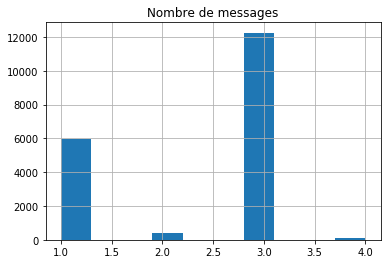

In [8]:
## Trace le nombre de message d'erreur par station pour chaque requête :
data1.iloc[1:, 2:3].hist()
plt.title("Nombre de messages")
plt.show()

#### On voit donc qu'en moyenne les stations sont majoritairements à 3 ou 1 message. Il serait intéressant de savoir le nombre total de message par type.

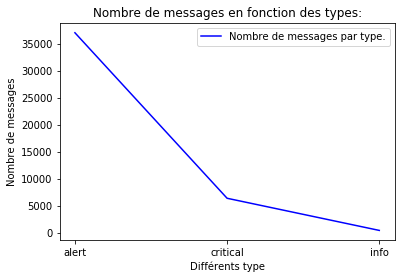

In [9]:
## Calcul du nombre de message par type :
nbrMsgTyp = {'alert': 0, 'critical': 0, 'info': 0}


for index, row in data1.iterrows():
    nbreOfMsgs = row["number of messages"]
    
    # We iterate over the number of messages
    for i in range (0, nbreOfMsgs):
        # Getting all the values of level:
        accesStrLvl = "level" + str(i+1)
        nbrMsgTyp[row[accesStrLvl]] +=1

## Tracé du nombre de message par type :


x = []
y = []

for key, value in nbrMsgTyp.items():
    x.append(key)
    y.append(value)

    
plt.plot(x, y, color='blue', label="Nombre de messages par type.")

plt.xlabel("Différents type")
plt.ylabel("Nombre de messages")
plt.title("Nombre de messages en fonction des types:")

plt.legend()
plt.show()


print("")

## Preprocessing tweets

In [10]:
#dataframe.iloc[1:] removes first row, the row 0
#datafram.drop(nameof the row) drops the row by its name

path2 = "DonneesRATP_Projet2020_Jeux_1/Données_Divers/"

data2 = pd.read_csv(path2 + "Tweet_RATP.csv", names = ["Date and Time", "Tweets"]).drop(0)#.iloc[1:]#, delimiter="\t", encoding='latin'


# Converts the data into date and time
for index, row in data2.iterrows():
    data2["Date and Time"][index] = datetime.strptime(row["Date and Time"], "%Y-%m-%d %X")

data2


,Date and Time,Tweets
1,2019-02-13 09:32:48,RT @T2_RATP: [#AccidentT2] Le trafic a pu repr...
2,2019-02-13 08:54:07,"@Aure_Magik Bonjour Aure, je suis désolée pour..."
3,2019-02-13 07:35:45,"@EdnaNewhouse Bonjour, il y a un incident d'ex..."
4,2019-02-12 23:25:32,"00:23, l'arrêt est à nouveau marqué à Porte Ma..."
5,2019-02-12 23:19:49,"@cocoricorail Bonsoir Cora, merci à vous et un..."
...,...,...
3196,2016-12-31 22:53:38,@Azou1er Nous vous remercions pour vos voeux e...
3197,2016-12-31 22:28:52,"21:25, la station Champs-Elysees-Clemenceau es..."
3198,2016-12-31 22:25:33,La station Champs Elysées Clemenceau #Ligne1 #...
3199,2016-12-31 20:48:23,@marieg1202 Par mesure de sécurité liée au spe...


In [11]:
## How to use date and time :

#data2["Date and Time"][1].year
#data2["Date and Time"][1].month
#data2["Date and Time"][1].day
#data2["Date and Time"][1].hour 
#data2["Date and Time"][1].minute 
#data2["Date and Time"][1].second



## keep track of the indexes of the usefull dates:
min_index = 0
max_index = 0

# The interval of the tweets selected:
firstDay, lastDay = (27, 29)

# Converts the data into date and time
for index, row in data2.iterrows():
    day, month, year = row["Date and Time"].day, row["Date and Time"].month, row["Date and Time"].year
    if(firstDay <= day <= lastDay and month == 5 and year == 2018):
        if(min_index == 0): min_index = index
        max_index = index

print(min_index, max_index)

data2parJours = data2.iloc[min_index-1:max_index]
print(data2parJours)
print("\n")
print("\n")

print("L'intégralité des tweets entre le 27 et 29 mai : \n")
for index, row in data2parJours.iterrows():
    print(row["Tweets"])

1817 1824
            Date and Time                                             Tweets
1817  2018-05-29 14:55:49  Art &amp; machines font ils bon ménage ? Décou...
1818  2018-05-29 09:50:38  RT @Ligne3_RATP: La station Europe est rebapti...
1819  2018-05-27 10:39:34  12:37, le trafic est rétabli sur la ligne (Per...
1820  2018-05-27 10:19:18  @pbar92 Par mesure de sécurité, a la demande d...
1821  2018-05-27 10:16:29  12:15, le trafic reprend progressivement sur l...
1822  2018-05-27 10:13:01  En raison de personne sur les voies, le trafic...
1823  2018-05-27 10:12:28  12:11, le trafic est interrompu entre Etoile e...
1824  2018-05-27 10:07:32  12:05, le trafic est interrompu de Chateau de ...




L'intégralité des tweets entre le 27 et 29 mai : 

Art &amp; machines font ils bon ménage ? Découvrez-le au travers de l'expo #ArtistesEtRobots au @GrandPalaisRmn ! Prépa… https://t.co/ATthehPE0k
RT @Ligne3_RATP: La station Europe est rebaptisée Europe – Simone Veil, en hommage à la première 

### Conclusion sur les données du 27 au 29 mai 2018 sur le compte Twitter :

1. Tout d'abord, nous avons isolé les tweets de la RATP du 27 au 29 mai. Cet interval correspond à l'interval de temps de nos observations sur le RER B. 
2. Cependant, les tweets ne mentionnent pas le RER B, ce qui ne nous donne aucune information en plus sur celui-ci.
3. Après un peu plus de recherche approfondie, il nous semble qu'il s'agit du compte twitter de la ligne de métro numéro 1. N'est pas en relation directe   notre travail sur le RER B.
4. Il est quand même intéressant de remarquer que par rapport aux autres périodes de temps, peu de tweets ont eu lieu. (Probablement parce qu'ils ont eu lieu entre le dimanche et le mardi.)

<center>$\Rightarrow$ Nous n'avons donc pas exploité ses données pour nos analyses.</center>


## Analyse des défaillances de la ligne 1 grâce à Twitter :

In [12]:
## On compte le nombre de fois que le "le trafic est interrompu" ou "le trafic est perturbé" sur la ligne 1:

# on stock le nombre de tweets et tweets estimés:
nbrOfMsgs = len(data2["Date and Time"])
nbrOfImpMsgs = 0

#Interval d'observation:
endDate = data2["Date and Time"][1]
startDate = data2["Date and Time"][nbrOfMsgs]

# Dictionnaire qui converti les sorties de week-days en jour :
dateToDay = {0:"Lundi", 1:"mardi", 2:"mercredi", 3:"Jeudi", 4:"Vendredi", 5:"Samedi", 6:"Dimanche"}

# Dictionnaire qui converti les sorties de month en mois :
dateToMonth = {1:"janvier", 2:"février", 3:"mars", 4:"avril", 5:"mai", 6:"juin",
             7:"juillet", 8:"août", 9:"septembre", 10:"octobre", 11:"novembre", 12:"décembre"}

# Dictionnaire qui stock le nombre de tweets par jour :
msgsPerDay = {"Lundi": 0, "mardi": 0, "mercredi": 0, "Jeudi": 0, "Vendredi": 0, "Samedi":0, "Dimanche":0}

# Dictionnaire qui stock le nombre de fois que le "le trafic est interrompu" ou "le trafic est perturbé" par jour :
importantMsgsPerDay = {"Lundi": 0, "mardi": 0, "mercredi": 0, "Jeudi": 0, "Vendredi": 0, "Samedi":0, "Dimanche":0}

# Dictionnaire qui stock le nombre de tweets par mois :
msgsPerMonth = {}

# Dictionnaire qui stock le nombre de fois que le "le trafic est interrompu" ou "le trafic est perturbé" par mois :
importantMsgsPerMonth = {}


for index, row in data2.iterrows():
    day = dateToDay[row["Date and Time"].weekday()]
    msgsPerDay[day] += 1
    
    monthYear = str(row["Date and Time"].month) + "/" + str(row["Date and Time"].year)[2:]#dateToMonth[row["Date and Time"].month] + " " + str(row["Date and Time"].year)
    if(monthYear in msgsPerMonth.keys()): msgsPerMonth[monthYear] += 1 
    else: msgsPerMonth[monthYear] = 1
    
    if("le trafic est interrompu" in row["Tweets"] or "le trafic est perturbé" in row["Tweets"]):
        importantMsgsPerDay[day] += 1
        nbrOfImpMsgs += 1
        
        if(monthYear in importantMsgsPerMonth.keys()): importantMsgsPerMonth[monthYear] += 1 
        else: importantMsgsPerMonth[monthYear] = 1

### Présentation macro des données :

In [13]:
print("Nombre de tweets entre " + str(startDate) + " et le " + str(endDate) + " : " +  str(nbrOfMsgs))

print("\n")

print("Nombre de tweets contenant des informations d'interruption entre " + str(startDate) + " et le " + str(endDate) + " : " +  str(nbrOfImpMsgs))

print("\n")

print("Le nombre de Tweets par jour : " )
print(msgsPerDay)

print("\n")

print("Le nombre de tweets contenant des informations d'interruption par jour :" )
print(importantMsgsPerDay)

Nombre de tweets entre 2016-12-31 20:46:53 et le 2019-02-13 09:32:48 : 3200


Nombre de tweets contenant des informations d'interruption entre 2016-12-31 20:46:53 et le 2019-02-13 09:32:48 : 456


Le nombre de Tweets par jour : 
{'Lundi': 406, 'mardi': 503, 'mercredi': 446, 'Jeudi': 384, 'Vendredi': 450, 'Samedi': 616, 'Dimanche': 395}


Le nombre de tweets contenant des informations d'interruption par jour :
{'Lundi': 65, 'mardi': 76, 'mercredi': 80, 'Jeudi': 60, 'Vendredi': 72, 'Samedi': 69, 'Dimanche': 34}


##### À partir de maintenant, nous allons appeler les tweets contenant `le trafic est interrompu` ou `le trafic est perturbé`.

### Graph des données normalisées :

{'Lundi': 0.126875, 'mardi': 0.1571875, 'mercredi': 0.139375, 'Jeudi': 0.12, 'Vendredi': 0.140625, 'Samedi': 0.1925, 'Dimanche': 0.1234375}
{'Lundi': 0.1425438596491228, 'mardi': 0.16666666666666666, 'mercredi': 0.17543859649122806, 'Jeudi': 0.13157894736842105, 'Vendredi': 0.15789473684210525, 'Samedi': 0.1513157894736842, 'Dimanche': 0.07456140350877193}


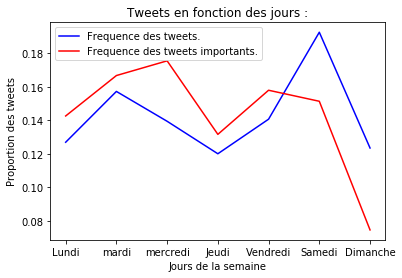

In [14]:
# Dictionnaire qui converti les sorties de week-days en jours:
normImportantMsgsPerDay = {"Lundi": 0, "mardi": 0, "mercredi": 0, "Jeudi": 0, "Vendredi": 0, "Samedi":0, "Dimanche":0}

# Dictionnaire qui stock le nombre de tweets par jours :
normMsgsPerDay = {"Lundi": 0, "mardi": 0, "mercredi": 0, "Jeudi": 0, "Vendredi": 0, "Samedi":0, "Dimanche":0}

for el in normImportantMsgsPerDay.keys():
    normMsgsPerDay[el] = msgsPerDay[el] / nbrOfMsgs

for el in normImportantMsgsPerDay.keys():
    normImportantMsgsPerDay[el] = importantMsgsPerDay[el] / nbrOfImpMsgs

print(normMsgsPerDay)
print(normImportantMsgsPerDay)

x1 = []
y1 = []

for key, value in normMsgsPerDay.items():
    x1.append(key)
    y1.append(value)
    
x2 = []
y2 = []

for key, value in normImportantMsgsPerDay.items():
    x2.append(key)
    y2.append(value)

plt.plot(x1, y1, color='blue', label="Frequence des tweets.")
plt.plot(x2, y2, color='red', label="Frequence des tweets importants.")

plt.xlabel("Jours de la semaine")
plt.ylabel("Proportion des tweets")
plt.title("Tweets en fonction des jours :")

plt.legend()
plt.show()

## Interessant de voir que la proportion de tweets important diminue en week-end 
## => plus de pub ou info pas en relation avec la circulation

##### Remarques :

* En semaine, la proportion de tweets "important" est plus élevée que pendant le week-end, ce qui peut refléter la politique de COM de la RATP qui donne des informations annexes pendant le week-end.
* Mercredi est le jour où il y a le plus de pannes. Et samedi où il y a le plus de tweets.

### Graph des tweets par mois :

In [15]:
## Data sans affichage:
print("Nombre de tweets par mois entre " + str(startDate) + " et le " + str(endDate) + " : ")
print(msgsPerMonth)
print("\n")
print("Nombre de tweets importants par mois entre " + str(startDate) + " et le " + str(endDate) + " : ")
print(importantMsgsPerMonth)

Nombre de tweets par mois entre 2016-12-31 20:46:53 et le 2019-02-13 09:32:48 : 
{'2/19': 80, '1/19': 200, '12/18': 351, '11/18': 290, '10/18': 132, '9/18': 143, '8/18': 99, '7/18': 309, '6/18': 159, '5/18': 168, '4/18': 51, '3/18': 119, '2/18': 71, '1/18': 99, '12/17': 103, '11/17': 74, '10/17': 72, '9/17': 79, '8/17': 65, '7/17': 94, '6/17': 127, '5/17': 60, '4/17': 69, '3/17': 80, '2/17': 37, '1/17': 60, '12/16': 9}


Nombre de tweets importants par mois entre 2016-12-31 20:46:53 et le 2019-02-13 09:32:48 : 
{'2/19': 3, '1/19': 20, '12/18': 44, '11/18': 48, '10/18': 23, '9/18': 22, '8/18': 13, '7/18': 21, '6/18': 37, '5/18': 27, '4/18': 9, '3/18': 26, '2/18': 14, '1/18': 24, '12/17': 13, '11/17': 11, '10/17': 21, '9/17': 5, '8/17': 16, '7/17': 5, '6/17': 23, '5/17': 7, '4/17': 4, '3/17': 11, '2/17': 1, '1/17': 8}


In [16]:
## On a seulement l'information d'un seul jour du 12/16 et 13 jours du février 2019 donc on les ignore.

msgsPerMonth.pop('2/19')
msgsPerMonth.pop('12/16')

importantMsgsPerMonth.pop('2/19')

3

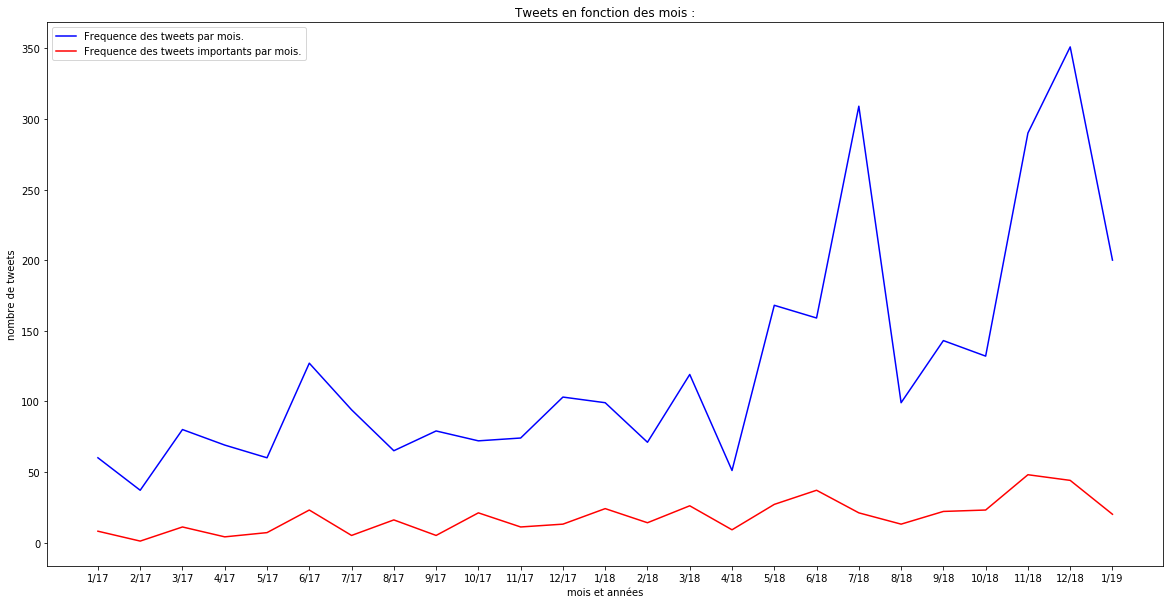

In [17]:
## Plot :

x1 = []
y1 = []

for key, value in msgsPerMonth.items():
    x1.append(key)
    y1.append(value)
    

    
x2 = []
y2 = []

for key, value in importantMsgsPerMonth.items():
    x2.append(key)
    y2.append(value)


# ordre décroissant en sortie, on les inverse:
x1.reverse()
y1.reverse()
x2.reverse()
y2.reverse()

plt.figure(figsize=(20,10))
    
plt.plot(x1, y1, color='blue', label="Frequence des tweets par mois.")
plt.plot(x2, y2, color='red', label="Frequence des tweets importants par mois.")

plt.xlabel("mois et années")
plt.ylabel("nombre de tweets")
plt.title("Tweets en fonction des mois :")


plt.legend()
plt.show()

## Tweets inutile croissant:
# Soit la RATP change de manière d'annoncer les pannes soit ils changent leur politique de com.



##### Remarques :

* Jusqu'en avril 2018 l'écart entre le nombre de tweets importants et le nombre total de tweets est presque constant. À partir de mai 2018 l'écart s'accroit.
* Ceci peut être dû à plusieurs choses, voici nos spéculations :

    1. Ils ont changé de politique de communication.
    2. Ils ont changé la personne qui se charger du compte.
    3. Ils ont décidé d'organiser des évènements en été et à Noël.